In [1]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('/home/adeepika/Desktop/Python/ABC Learn Python/athlete_events.csv')
df.shape

(271116, 15)

In [2]:
list(df)

['ID',
 'Name',
 'Sex',
 'Age',
 'Height',
 'Weight',
 'Team',
 'NOC',
 'Games',
 'Year',
 'Season',
 'City',
 'Sport',
 'Event',
 'Medal']

(<matplotlib.axes._subplots.AxesSubplot at 0x7f0429ce0fd0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0429ce0fd0>)

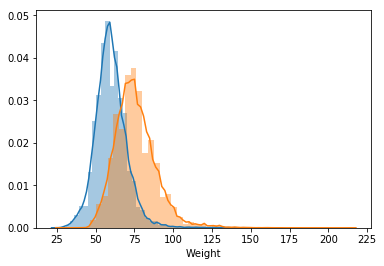

In [3]:
(sns.distplot(df[df.Sex=='F'].Weight.dropna()),
sns.distplot(df[df.Sex=='M'].Weight.dropna())
)


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


(<matplotlib.axes._subplots.AxesSubplot at 0x7f0429ba6b10>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0429ba6b10>)

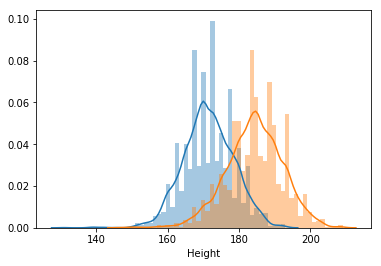

In [4]:
(sns.distplot(df[df.Sex=='F'][ df.Sport=='Swimming'].Height.dropna()),
sns.distplot(df[df.Sex=='M'][df.Sport=='Swimming'].Height.dropna())
)

In [5]:
def NaN_percent(df, column_name):
    row_count = df[column_name].shape[0]
    empty_values = row_count - df[column_name].count()
    return (100.0*empty_values)/row_count

In [6]:
NaN_percent(df, 'Height')

22.193821095029435

In [7]:
for i in list(df):
    print(i +': ' + str(NaN_percent(df,i))+'%')

ID: 0.0%
Name: 0.0%
Sex: 0.0%
Age: 3.49444518214%
Height: 22.193821095%
Weight: 23.191180159%
Team: 0.0%
NOC: 0.0%
Games: 0.0%
Year: 0.0%
Season: 0.0%
City: 0.0%
Sport: 0.0%
Event: 0.0%
Medal: 85.3262072323%


In [8]:
total_rows = df.shape[0]
unique_athletes = len(df.Name.unique())
medal_winners = len(df[df.Medal.fillna('None')!='None'].Name.unique())

"{0} {1} {2}".format(total_rows, unique_athletes, medal_winners)

'271116 134732 28202'

In [9]:
print(df[df.Medal.fillna('None')!='None'].Medal.value_counts())
df[df.Medal.fillna('None')!='None'].shape[0]

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64


39783

In [10]:
team_medal_count = df.groupby(['Team','Medal']).Medal.agg('count')
team_medal_count = team_medal_count.reset_index(name='count').sort_values(['count'], ascending=False)
team_medal_count.head(10)

,Team,Medal,count
726,United States,Gold,2474
727,United States,Silver,1512
725,United States,Bronze,1233
627,Soviet Union,Gold,1058
628,Soviet Union,Silver,716
263,Germany,Gold,679
262,Germany,Bronze,678
626,Soviet Union,Bronze,677
264,Germany,Silver,627
278,Great Britain,Silver,582


In [11]:
def get_country_stats(country):
    return team_medal_count[team_medal_count.Team==country]

In [12]:
get_country_stats('Chile')

,Team,Medal,count
121,Chile,Bronze,20
123,Chile,Silver,9
122,Chile,Gold,3


In [13]:
df[df.Team=='Croatia'].Year.unique()

array([2006, 1996, 2000, 1992, 2008, 2012, 2004, 2016, 2014, 2010, 2002,
       1998, 1994])

In [14]:
unique_women = len(df[df.Sex=='F'].Name.unique())
unique_men = len(df[df.Sex=='M'].Name.unique())
women_medals = df[df.Sex=='F'].Medal.count()
men_medals = df[df.Sex=='M'].Medal.count()

print("{} {} {} {} ".format(unique_women, unique_men, women_medals, men_medals ))

df[df.Sex=='F'].Year.min()

33808 100979 11253 28530 


1900

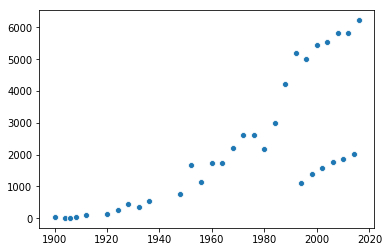

In [15]:
female = df[df.Sex=='F']
year_count = female.groupby('Year').agg('count')
years = list(year_count.index)
counts =  list(year_count.Name)
sns.scatterplot(x = years, y = counts)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f0429114f90>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0429114f90>)

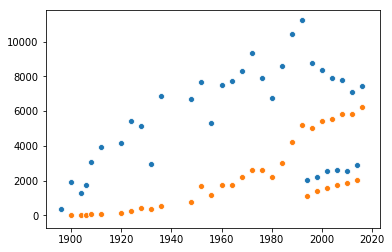

In [16]:
f_year_count = df[df.Sex=='F'].groupby('Year').agg('count').Name
m_year_count = df[df.Sex=='M'].groupby('Year').agg('count').Name
(sns.scatterplot(data= m_year_count),
 sns.scatterplot(data =f_year_count))

In [17]:
df.Sport.value_counts()

Athletics                38624
Gymnastics               26707
Swimming                 23195
Shooting                 11448
Cycling                  10859
Fencing                  10735
Rowing                   10595
Cross Country Skiing      9133
Alpine Skiing             8829
Wrestling                 7154
Football                  6745
Sailing                   6586
Equestrianism             6344
Canoeing                  6171
Boxing                    6047
Speed Skating             5613
Ice Hockey                5516
Hockey                    5417
Biathlon                  4893
Basketball                4536
Weightlifting             3937
Water Polo                3846
Judo                      3801
Handball                  3665
Art Competitions          3578
Volleyball                3404
Bobsleigh                 3058
Tennis                    2862
Diving                    2842
Ski Jumping               2401
                         ...  
Badminton                 1457
Nordic C